# Table of Content
1. Import libraries and data
2. Merging department and merged data frames
3. Create customers profiles
4. Profiles distribution visualization
5. Aggregate the max, mean, and min variables
6. Compare your customer profiles

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import Original Data (Path)

path = r'/Users/ladyarmanoid/Documents/Data Analytics/CareerFoundry/Course/2- Data Immersion/Achievement 4/Instacart Basket Analysis/'

# Import dataframe 'normal_activity'

df_normal_activity = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'normal_activity.pkl'))

In [3]:
# Checking dataframe output

df_normal_activity.head()

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,customer_frequency,frequency_flag,gender,state,age,dependants,fam_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,20.5,non_frequent_customer,Female,Alabama,31,3,married,40423,South,normal_activity
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,20.5,non_frequent_customer,Female,Alabama,31,3,married,40423,South,normal_activity
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,20.5,non_frequent_customer,Female,Alabama,31,3,married,40423,South,normal_activity
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,20.5,non_frequent_customer,Female,Alabama,31,3,married,40423,South,normal_activity
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,20.5,non_frequent_customer,Female,Alabama,31,3,married,40423,South,normal_activity


## Change types to shorten memory usage

In [4]:
df_normal_activity['orders_day_of_week'] = df_normal_activity['orders_day_of_week'].astype('int8')

In [5]:
df_normal_activity['order_hour_of_day'] = df_normal_activity['order_hour_of_day'].astype('int8')

In [6]:
df_normal_activity['reordered'] = df_normal_activity['reordered'].astype('int8')

In [7]:
df_normal_activity['department_id'] = df_normal_activity['department_id'].astype('int8')

In [9]:
df_normal_activity['number_of_orders'] = df_normal_activity['number_of_orders'].astype('int16')

In [10]:
df_normal_activity['add_to_cart_order'] = df_normal_activity['add_to_cart_order'].astype('int16')

In [11]:
df_normal_activity['aisle_id'] = df_normal_activity['aisle_id'].astype('int16')

In [12]:
df_normal_activity['max_order'] = df_normal_activity['max_order'].astype('int16')

In [13]:
df_normal_activity['order_id'] = df_normal_activity['order_id'].astype('int32')

In [14]:
df_normal_activity['product_id'] = df_normal_activity['product_id'].astype('int32')

In [15]:
df_normal_activity['days_since_prior_order'].dtype

dtype('float64')

In [16]:
df_normal_activity['days_since_prior_order'] = df_normal_activity['days_since_prior_order'].astype('float32')

In [17]:
df_normal_activity['prices'] = df_normal_activity['prices'].astype('float32')

In [18]:
df_normal_activity['average_spend'] = df_normal_activity['average_spend'].astype('float32')

In [19]:
df_normal_activity['customer_frequency'] = df_normal_activity['customer_frequency'].astype('float32')

In [20]:
# Checking shape

df_normal_activity.shape

(30964564, 31)

In [21]:
# Checking info

df_normal_activity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404854
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   user_id                 int64  
 2   number_of_orders        int16  
 3   orders_day_of_week      int8   
 4   order_hour_of_day       int8   
 5   days_since_prior_order  float32
 6   product_id              int32  
 7   add_to_cart_order       int16  
 8   reordered               int8   
 9   product_name            object 
 10  aisle_id                int16  
 11  department_id           int8   
 12  prices                  float32
 13  price_range_loc         object 
 14  busiest_day             object 
 15  busiest_days            object 
 16  busiest_period_of_day   object 
 17  max_order               int16  
 18  loyalty_flag            object 
 19  average_spend           float32
 20  spender_flag            object 
 21  customer_frequency      float32
 2

In [22]:
# Checking column 'max_order' >= 5

df_normal_activity['max_order']

0           10
1           10
2           10
3           10
4           10
            ..
32404850    26
32404851    26
32404852    26
32404853    26
32404854    26
Name: max_order, Length: 30964564, dtype: int16

In [23]:
# Check minimum 'max_order'
    
df_normal_activity['max_order'].min()

5

In [24]:
# Check max 'max_order'
    
df_normal_activity['max_order'].max()

99

In [25]:
# Checking 'department_id'

df_normal_activity['department_id']

0           7
1           7
2           7
3           7
4           7
           ..
32404850    7
32404851    7
32404852    7
32404853    7
32404854    7
Name: department_id, Length: 30964564, dtype: int8

In [26]:
# Import dataframe 'departments_wrangled'

df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [27]:
# Checking dataframe output

df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [28]:
# Rename 'unnamed:0' column to 'department_id'

df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [29]:
# Check output

df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [30]:
# Merging dataframes 'df_normal_activity' with 'df_dept'

df_merged = df_normal_activity.merge(df_dept, on = 'department_id')

In [31]:
# Check output

df_merged

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,gender,state,age,dependants,fam_status,income,region,activity_flag,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,non_frequent_customer,Female,Alabama,31,3,married,40423,South,normal_activity,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,non_frequent_customer,Female,Alabama,31,3,married,40423,South,normal_activity,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,non_frequent_customer,Female,Alabama,31,3,married,40423,South,normal_activity,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,non_frequent_customer,Female,Alabama,31,3,married,40423,South,normal_activity,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,non_frequent_customer,Female,Alabama,31,3,married,40423,South,normal_activity,beverages
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30964559,525976,58201,24,6,16,3.0,5161,1,1,Dried Mango,...,regular_customer,Male,Florida,75,2,married,138066,South,normal_activity,bulk
30964560,758290,58201,26,0,12,9.0,5161,1,1,Dried Mango,...,regular_customer,Male,Florida,75,2,married,138066,South,normal_activity,bulk
30964561,460711,58201,27,6,9,13.0,5161,1,1,Dried Mango,...,regular_customer,Male,Florida,75,2,married,138066,South,normal_activity,bulk
30964562,1605789,58201,28,5,7,27.0,5161,1,1,Dried Mango,...,regular_customer,Male,Florida,75,2,married,138066,South,normal_activity,bulk


# 3. Creating customer profiles

In [32]:
# Check minimum age

df_merged['age'].min()

18

In [33]:
# Check maximum age

df_merged['age'].max()

81

In [34]:
## Create age groups between 18 and 81 years old

In [35]:
# **All age groups**

# Age group -> 18 to 29 years old

df_merged.loc[(df_merged['age'] >= 18) & (df_merged['age'] <= 29), 'age_group'] = '18-29 years old'

# Age group -> 30 to 64 years old

df_merged.loc[(df_merged['age'] >= 30) & (df_merged['age'] <= 44), 'age_group'] = '30-44 years old'

# Age group -> 45 to 59 years old
df_merged.loc[(df_merged['age'] >= 45) & (df_merged['age'] <= 59), 'age_group'] = '45-59 years old'

# Age group -> 60 to 81 years old

df_merged.loc[(df_merged['age'] >= 60) & (df_merged['age'] <= 81), 'age_group'] = '60-81 years old'

# Check output

df_merged['age_group'].value_counts(dropna = False)

age_group
60-81 years old    10574504
45-59 years old     7311091
30-44 years old     7261366
18-29 years old     5817603
Name: count, dtype: int64

## Income groups

In [36]:
# Check minimum 'income'
    
df_merged['income'].min()

25903

In [37]:
# Check average 'income'
    
df_merged['income'].mean()

99675.86510754681

In [38]:
# Check maximum 'income'
    
df_merged['income'].max()

593901

Income ranges between $25,903 and $593,901

## Create income groups

In [39]:
# Income group under $50K

df_merged.loc[df_merged['income'] < 50000,'income_group'] = 'lower income'

# Income group between $50 and $100K

df_merged.loc[(df_merged['income'] >= 50000) & (df_merged['income'] < 100000),'income_group'] = 'middle income'

# Income group above $100K

df_merged.loc[df_merged['income'] >= 100000, 'income_group'] = 'high income'

# Check output

df_merged['income_group'].value_counts(dropna = False)

income_group
high income      14207402
middle income    13394608
lower income      3362554
Name: count, dtype: int64

In [40]:
df_merged['income_group']

0           lower income
1           lower income
2           lower income
3           lower income
4           lower income
                ...     
30964559     high income
30964560     high income
30964561     high income
30964562     high income
30964563    lower income
Name: income_group, Length: 30964564, dtype: object

## Dependant groups

**Dependants count ranges from 0 to 3 dependants**

In [41]:
# Check minimum dependants
    
df_merged['dependants'].min()

0

In [42]:
# Check average dependants
    
df_merged['dependants'].mean()

1.501819176268718

In [43]:
# Check maximum dependants
    
df_merged['dependants'].max()

3

## Create dependant groups

In [44]:
# No dependant group

df_merged.loc[df_merged['dependants'] <= 0, 'dependants_group'] = 'no dependants'

# Has dependants

df_merged.loc[df_merged['dependants'] > 0, 'dependants_group'] = 'has dependants'

# Check output

df_merged['dependants_group'].value_counts(dropna = False)

dependants_group
has dependants    23224883
no dependants      7739681
Name: count, dtype: int64

In [45]:
df_merged['dependants_group']

0           has dependants
1           has dependants
2           has dependants
3           has dependants
4           has dependants
                 ...      
30964559    has dependants
30964560    has dependants
30964561    has dependants
30964562    has dependants
30964563    has dependants
Name: dependants_group, Length: 30964564, dtype: object

In [46]:
# Check dataframe output

df_merged.head()

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,dependants,fam_status,income,region,activity_flag,department,age_group,income_group,dependants_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,31,3,married,40423,South,normal_activity,beverages,30-44 years old,lower income,has dependants
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,31,3,married,40423,South,normal_activity,beverages,30-44 years old,lower income,has dependants
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,31,3,married,40423,South,normal_activity,beverages,30-44 years old,lower income,has dependants
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,31,3,married,40423,South,normal_activity,beverages,30-44 years old,lower income,has dependants
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,3,married,40423,South,normal_activity,beverages,30-44 years old,lower income,has dependants


In [47]:
# Checking marital status counts

df_merged['fam_status'].value_counts(dropna = False)

fam_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

In [48]:
# Create a crosstab for 'fam_status' vs. 'dependants_group'

marital_dependants_crosstab = pd.crosstab(df_merged['dependants_group'],df_merged['fam_status'],dropna = False)

In [49]:
marital_dependants_crosstab

fam_status,divorced/widowed,living with parents and siblings,married,single
dependants_group,,,,
has dependants,0,1481172,21743711,0
no dependants,2645271,0,0,5094410


In [50]:
# Create a crosstab for 'age_group' vs. 'dependants_group'

age_dependants_crosstab = pd.crosstab(df_merged['age_group'],df_merged['dependants_group'],dropna = False)

In [51]:
age_dependants_crosstab

dependants_group,has dependants,no dependants
age_group,,
18-29 years old,4369985,1447618
30-44 years old,5442572,1818794
45-59 years old,5483093,1827998
60-81 years old,7929233,2645271


In [52]:
df_merged['income_group'].value_counts(dropna = False)

income_group
high income      14207402
middle income    13394608
lower income      3362554
Name: count, dtype: int64

In [53]:
df_merged['age_group'].value_counts(dropna = False)

age_group
60-81 years old    10574504
45-59 years old     7311091
30-44 years old     7261366
18-29 years old     5817603
Name: count, dtype: int64

## Create profiling variables

### Create variable 'profile_1'

In [54]:
# Profile based on age, marital status, and number of dependants

# Single young adult w/o dependants

df_merged.loc[(df_merged['age_group']== '18-29 years old') & (df_merged['fam_status'].isin(['single', 'divorced/widowed'])) & (df_merged['dependants_group'] == 'no dependants'),'profile_1']= 'single young adult w/o dependants'

# Single adult w/o dependants

df_merged.loc[(df_merged['age_group'].isin(['30-44 years old', '45-59 years old'])) & (df_merged['fam_status'].isin(['single', 'divorced/widowed'])) & (df_merged['dependants_group'] == 'no dependants'),'profile_1']= 'single adult w/o dependants'

# Single older adult w/o dependants

df_merged.loc[(df_merged['age_group'] == '60-81 years old') & (df_merged['fam_status'].isin(['single', 'divorced/widowed'])) & (df_merged['dependants_group'] == 'no dependants'),'profile_1']= 'single older adult w/o dependants'

# Single young adult with dependants

df_merged.loc[(df_merged['age_group']== '18-29 years old') & (df_merged['fam_status'] == 'living with parents and siblings') & (df_merged['dependants_group'] == 'has dependants'),'profile_1']= 'single young adult with dependants'

# Single adult with dependants

df_merged.loc[(df_merged['age_group'].isin(['30-44 years old', '45-59 years old'])) & (df_merged['fam_status'] == 'living with parents and siblings') & (df_merged['dependants_group'] == 'has dependants'),'profile_1']= 'single adult with dependants'

#single older adult with dependants

df_merged.loc[(df_merged['age_group'] == '60-81 years old') & (df_merged['fam_status']== 'living with parents and siblings') & (df_merged['dependants_group'] == 'has dependants'),'profile_1']= 'single older adult with dependants'

# Married young adult with dependants

df_merged.loc[(df_merged['age_group']== '18-29 years old') & (df_merged['fam_status']== 'married') & (df_merged['dependants_group'] == 'has dependants'),'profile_1']= 'married young adult with dependants'

# Married adult with dependants

df_merged.loc[(df_merged['age_group'].isin(['30-44 years old', '45-59 years old'])) & (df_merged['fam_status'] == 'married') & (df_merged['dependants_group'] == 'has dependants'),'profile_1']= 'married adult with dependants'

# Married older adult with dependants

df_merged.loc[(df_merged['age_group'] == '60-81 years old') & (df_merged['fam_status']== 'married') & (df_merged['dependants_group'] == 'has dependants'),'profile_1']= 'married older adult with dependants'

# Check output

df_merged['profile_1'].value_counts(dropna = False)

profile_1
married adult with dependants          10925665
married older adult with dependants     7929233
single adult w/o dependants             3646792
married young adult with dependants     2888813
single older adult w/o dependants       2645271
single young adult with dependants      1481172
single young adult w/o dependants       1447618
Name: count, dtype: int64

### Create variable 'profile_2'

In [55]:
# Profile based on age, marital status, income, and number of dependants

# Low income single young adult w/o dependants

df_merged.loc[(df_merged['age_group']== '18-29 years old') & (df_merged['fam_status'].isin(['single', 'divorced/widowed'])) & (df_merged['income_group']=='lower income') & (df_merged['dependants_group'] == 'no dependants'),'profile_2']= 'low income single young adult w/o dependants'

# Low income single adult w/o dependants

df_merged.loc[(df_merged['age_group'].isin(['30-44 years old', '45-59 years old'])) & (df_merged['fam_status'].isin(['single', 'divorced/widowed'])) & (df_merged['income_group']=='lower income') & (df_merged['dependants_group'] == 'no dependants'),'profile_2']= 'low income single adult w/o dependants'

# Low income single older adult w/o dependants

df_merged.loc[(df_merged['age_group'] == '60-81 years old') & (df_merged['fam_status'].isin(['single', 'divorced/widowed'])) & (df_merged['income_group']=='lower income') & (df_merged['dependants_group'] == 'no dependants'),'profile_2']= 'low income single older adult w/o dependants'

# Low income single young adult with dependants

df_merged.loc[(df_merged['age_group']== '18-29 years old') & (df_merged['fam_status'] == 'living with parents and siblings') & (df_merged['income_group']=='lower income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'low income single young adult with dependants'

# Low income single adult with dependants

df_merged.loc[(df_merged['age_group'].isin(['30-44 years old', '45-59 years old'])) & (df_merged['fam_status'] == 'living with parents and siblings') & (df_merged['income_group']=='lower income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'low income single adult with dependants'

# Low income single older adult with dependants

df_merged.loc[(df_merged['age_group'] == '60-81 years old') & (df_merged['fam_status'] == 'living with parents and siblings') & (df_merged['income_group']=='lower income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'low income single older adult with dependants'

# Low income married young adult with dependants

df_merged.loc[(df_merged['age_group']== '18-29 years old') & (df_merged['fam_status'] == 'married') & (df_merged['income_group']=='lower income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'low income married young adult with dependants'

# Low income married adult with dependants

df_merged.loc[(df_merged['age_group'].isin(['30-44 years old','45-59 years old'])) & (df_merged['fam_status'] == 'married') & (df_merged['income_group']=='lower income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'low income married adult with dependants'

# Low income married older adult with dependants

df_merged.loc[(df_merged['age_group'] == '60-81 years old') & (df_merged['fam_status'] == 'married') & (df_merged['income_group']== 'lower income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'low income married older adult with dependants'

# Mid income single young adult w/o dependants

df_merged.loc[(df_merged['age_group']== '18-29 years old') & (df_merged['fam_status'].isin(['single', 'divorced/widowed'])) & (df_merged['income_group']=='middle income') & (df_merged['dependants_group'] == 'no dependants'),'profile_2']= 'mid income single young adult w/o dependants'

# Mid income single adult w/o dependants

df_merged.loc[(df_merged['age_group'].isin(['30-44 years old', '45-59 years old'])) & (df_merged['fam_status'].isin(['single', 'divorced/widowed'])) & (df_merged['income_group']=='middle income') & (df_merged['dependants_group'] == 'no dependants'),'profile_2']= 'mid income single adult w/o dependants'

# Mid income single older adult w/o dependants

df_merged.loc[(df_merged['age_group'] == '60-81 years old') & (df_merged['fam_status'].isin(['single', 'divorced/widowed'])) & (df_merged['income_group']=='middle income') & (df_merged['dependants_group'] == 'no dependants'),'profile_2']= 'mid income single older adult w/o dependants'

# Mid income single young adult with dependants

df_merged.loc[(df_merged['age_group']== '18-29 years old') & (df_merged['fam_status'] =='living with parents and siblings') & (df_merged['income_group']=='middle income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'mid income single young adult with dependants'

# Mid income single adult with dependants

df_merged.loc[(df_merged['age_group'].isin(['30-44 years old', '45-59 years old'])) & (df_merged['fam_status'] == 'living with parents and siblings') & (df_merged['income_group']=='middle income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'mid income single adult with dependants'

# Mid income single older adult with dependants

df_merged.loc[(df_merged['age_group'] == '60-81 years old') & (df_merged['fam_status'] == 'living with parents and siblings') & (df_merged['income_group']=='middle income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'mid income single older adult with dependants'

# Mid income married young adult with dependants

df_merged.loc[(df_merged['age_group']== '18-29 years old') & (df_merged['fam_status'] == 'married') & (df_merged['income_group']=='middle income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'mid income married young adult with dependants'

# Mid income married adult with dependants

df_merged.loc[(df_merged['age_group'].isin(['30-44 years old', '45-59 years old'])) & (df_merged['fam_status'] == 'married') & (df_merged['income_group']=='middle income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'mid income married adult with dependants'

# Mid income married older adult with dependants

df_merged.loc[(df_merged['age_group'] == '60-81 years old') & (df_merged['fam_status'] == 'married') & (df_merged['income_group']=='middle income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'mid income married older adult with dependants'

# High income single young adult w/o dependants

df_merged.loc[(df_merged['age_group']== '18-29 years old') & (df_merged['fam_status'].isin(['single', 'divorced/widowed'])) & (df_merged['income_group']=='high income') & (df_merged['dependants_group'] == 'no dependants'),'profile_2']= 'high income single young adult w/o dependants'

# High income single adult w/o dependants

df_merged.loc[(df_merged['age_group'].isin(['30-44 years old', '45-59 years old'])) & (df_merged['fam_status'].isin(['single', 'divorced/widowed'])) & (df_merged['income_group']=='high income') & (df_merged['dependants_group'] == 'no dependants'),'profile_2']= 'high income single adult w/o dependants'

# High income single older adult w/o dependants

df_merged.loc[(df_merged['age_group'] == '60-81 years old') & (df_merged['fam_status'].isin(['single', 'divorced/widowed'])) & (df_merged['income_group']=='high income') & (df_merged['dependants_group'] == 'no dependants'),'profile_2']= 'high income single older adult w/o dependants'

# High income single young adult with dependants

df_merged.loc[(df_merged['age_group']== '18-29 years old') & (df_merged['fam_status'] == 'living with parents and siblings') & (df_merged['income_group']=='high income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'high income single young adult with dependants'

# High income single adult with dependants

df_merged.loc[(df_merged['age_group'].isin(['30-44 years old', '45-59 years old'])) & (df_merged['fam_status'] == 'living with parents and siblings') & (df_merged['income_group']=='high income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'high income single adult with dependants'

# High income single older adult with dependants

df_merged.loc[(df_merged['age_group'] == '60-81 years old') & (df_merged['fam_status'] == 'living with parents and siblings') & (df_merged['income_group']=='high income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'high income single older adult with dependants'

# High income married young adult with dependants

df_merged.loc[(df_merged['age_group']== '18-29 years old') & (df_merged['fam_status'] == 'married') & (df_merged['income_group']=='high income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'high income married young adult with dependants'

# High income married adult with dependants

df_merged.loc[(df_merged['age_group'].isin(['30-44 years old', '45-59 years old'])) & (df_merged['fam_status'] == 'married') & (df_merged['income_group']=='high income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'high income married adult with dependants'

# High income married older adult with dependants

df_merged.loc[(df_merged['age_group'] == '60-81 years old') & (df_merged['fam_status'] == 'married') & (df_merged['income_group']=='high income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'high income married older adult with dependants'

# Check output

df_merged['profile_2'].value_counts(dropna = False)

profile_2
high income married older adult with dependants    5549516
high income married adult with dependants          4952600
mid income married adult with dependants           4781135
mid income married young adult with dependants     2359119
high income single older adult w/o dependants      1846202
mid income married older adult with dependants     1717467
high income single adult w/o dependants            1673864
mid income single adult w/o dependants             1574671
mid income single young adult with dependants      1213082
low income married adult with dependants           1191930
mid income single young adult w/o dependants       1160775
low income married older adult with dependants      662250
mid income single older adult w/o dependants        588359
low income married young adult with dependants      440912
low income single adult w/o dependants              398257
low income single young adult w/o dependants        237953
low income single young adult with dependants 

In [56]:
# Exporting 'final_merge' in a PKL format

df_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_merge.pkl'))

# 4. Profiles distribution visualization

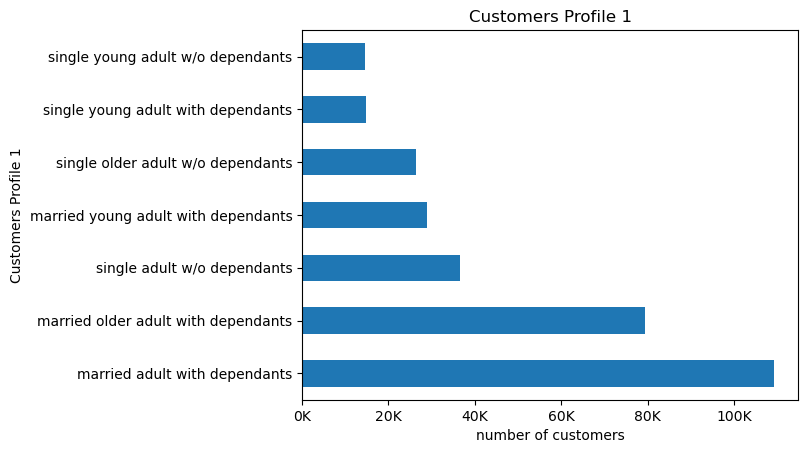

In [57]:
# Bar graph showing customers 'profile_1' counts

bar_profile_1 = df_merged['profile_1'].value_counts(dropna = False).plot.barh(title = 'Customers Profile 1', xlabel = "number of customers", ylabel = 'Customers Profile 1')

# Change X/Y Axis + Show Total Number of Customers

bar_profile_1.xaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: format(y/100000,'1.00f')+'K'))

In [58]:
# Exporting bar chart 'Customers Profile 1'

bar_profile_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customers_profile_1.png'))

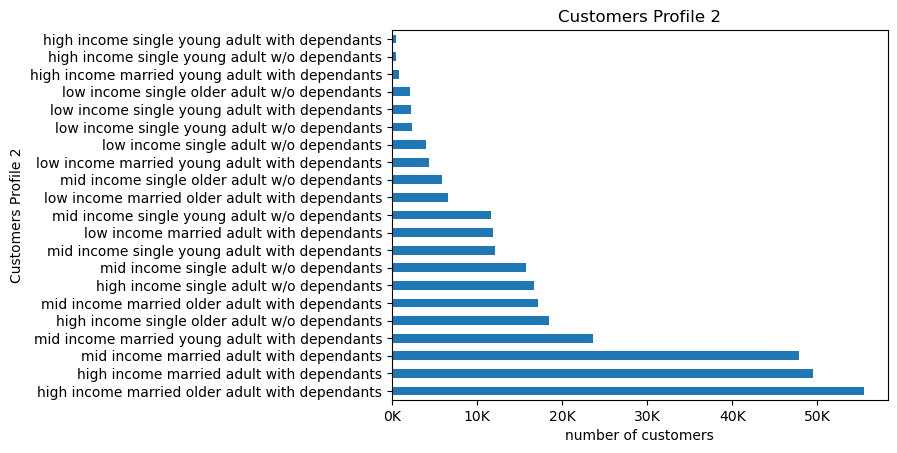

In [59]:
# Bar graph showing customers 'profile_2' counts

bar_profile_2 = df_merged['profile_2'].value_counts(dropna = False).plot.barh(title = 'Customers Profile 2', xlabel = "number of customers", ylabel = 'Customers Profile 2')

# Change X/Y Axis + Show Total Number of Customers

bar_profile_2.xaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: format(y/100000,'1.00f')+'K'))

In [60]:
# Exporting bar chart 'Customers Profile 2'

bar_profile_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customers_profile_2.png'))

# 5. Aggregate the max, mean, and min variables

In [61]:
# Aggregate minimum, maximum, and mean of customer's age for usage and expenditure

age_group_agg = df_merged.groupby('age_group')[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [62]:
# Check output

age_group_agg

days_since_prior_order                  prices                
                                   min   max       mean    min   max      mean
age_group                                                                     
18-29 years old                    0.0  30.0  10.815269    1.0  25.0  7.782198
30-44 years old                    0.0  30.0  10.806643    1.0  25.0  7.792443
45-59 years old                    0.0  30.0  10.823914    1.0  25.0  7.788404
60-81 years old                    0.0  30.0  10.800664    1.0  25.0  7.795446

In [63]:
# Aggregate minimum, maximum, and mean of customer's income for usage and expenditure

income_group_agg = df_merged.groupby('income_group')[['days_since_prior_order','prices']].agg(['min','max','mean'])

# Check output

income_group_agg

days_since_prior_order                  prices                
                                 min   max       mean    min   max      mean
income_group                                                                
high income                      0.0  30.0  10.769624    1.0  25.0  7.953438
lower income                     0.0  30.0  11.175807    1.0  25.0  6.707347
middle income                    0.0  30.0  10.762150    1.0  25.0  7.889854

In [64]:
# Aggregate minimum, maximum, and mean of customer's dependants for usage and expenditure

dependants_group_agg = df_merged.groupby('dependants_group')[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [65]:
# Check output

dependants_group_agg

days_since_prior_order                  prices        \
                                    min   max       mean    min   max   
dependants_group                                                        
has dependants                      0.0  30.0  10.816416    1.0  25.0   
no dependants                       0.0  30.0  10.791950    1.0  25.0   

                            
                      mean  
dependants_group            
has dependants    7.790936  
no dependants     7.789550

In [66]:
# Check dataframe columns

df_merged.columns

Index(['order_id', 'user_id', 'number_of_orders', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spender_flag', 'customer_frequency', 'frequency_flag',
       'gender', 'state', 'age', 'dependants', 'fam_status', 'income',
       'region', 'activity_flag', 'department', 'age_group', 'income_group',
       'dependants_group', 'profile_1', 'profile_2'],
      dtype='object')

In [67]:
# Create a crosstab for 'frequency_flag' and 'age_group'

age_group_frequency = pd.crosstab(df_merged['frequency_flag'],df_merged['age_group'],dropna = False)

In [68]:
# Check output

age_group_frequency

age_group,18-29 years old,30-44 years old,45-59 years old,60-81 years old
frequency_flag,,,,
frequent_customer,3993750,4969564,4988944,7252218
non_frequent_customer,539795,666820,697822,990538
regular_customer,1284058,1624982,1624325,2331748


# 6. Compare your customer profiles

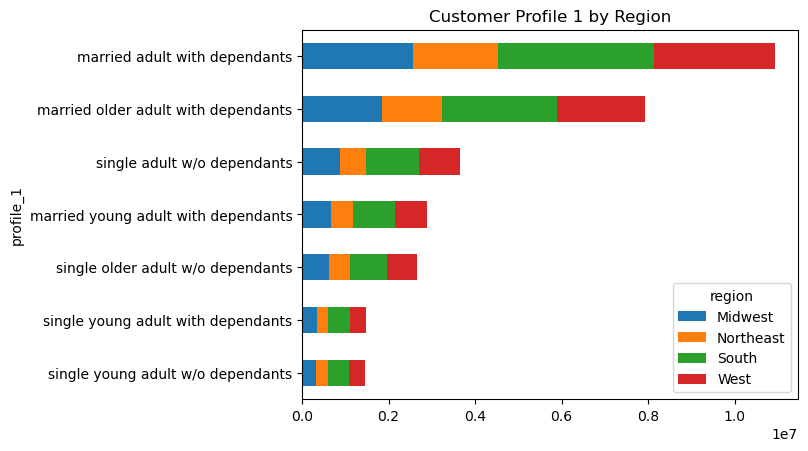

In [70]:
# Group by customer 'profile_1' and 'region'

customers_profile1_region = df_merged.groupby(['profile_1','region']).size().unstack()

# Sort

customers_profile1_region = customers_profile1_region.loc[customers_profile1_region.sum(axis = 1).sort_values(ascending = True).index]

# Create bar chart

customers_profile1_region = customers_profile1_region.plot.barh(stacked = True, title ='Customer Profile 1 by Region')

## Observations

The West region represents the customers with the **most married with dependants** status.

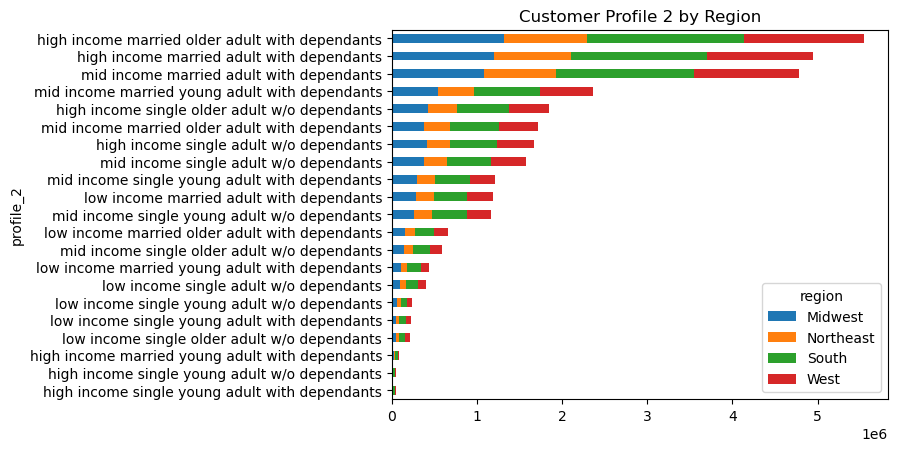

In [71]:
# Group by customer 'profile_2' and 'region'

customers_profile2_region = df_merged.groupby(['profile_2','region']).size().unstack()

# Sort

customers_profile2_region = customers_profile2_region.loc[customers_profile2_region.sum(axis=1).sort_values(ascending = True).index]

# Create bar chart

customers_profile2_region = customers_profile2_region.plot.barh(stacked = True, title ='Customer Profile 2 by Region')

In [72]:
# Exporting Customer bar chart 'Customer Profile 1 by Region'

customers_profile1_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profile_1_by_region.png'))

In [73]:
# Exporting Customer bar chart 'Customer Profile 2 by Region'

customers_profile2_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profile_2_by_region.png'))

Text(0, 0.5, 'Department')

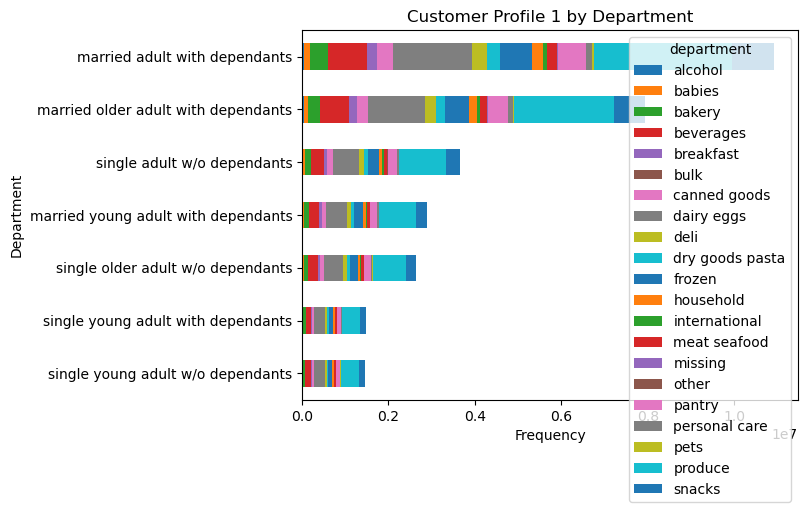

In [74]:
# Group by 'customer profile 1' and 'department'

customers_profile1_department = df_merged.groupby(['profile_1','department']).size().unstack()

# Sort

customers_profile1_department = customers_profile1_department.loc[customers_profile1_department.sum(axis = 1).sort_values(ascending = True).index]

# Create bar chart

customers_profile1_department = customers_profile1_department.plot.barh(stacked = True, title = 'Customer Profile 1 by Department')

# X-Axis Label

plt.xlabel('Frequency')

# Y-Axis Label

plt.ylabel('Department')

## Observations

Snacks and Produce are the top deparments specially for **married couples with dependants**.

In [75]:
# Exporting 'Customer Profile 1' by 'department'

customers_profile1_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customers_profile_1_by_department.png'))

Text(0, 0.5, 'Department')

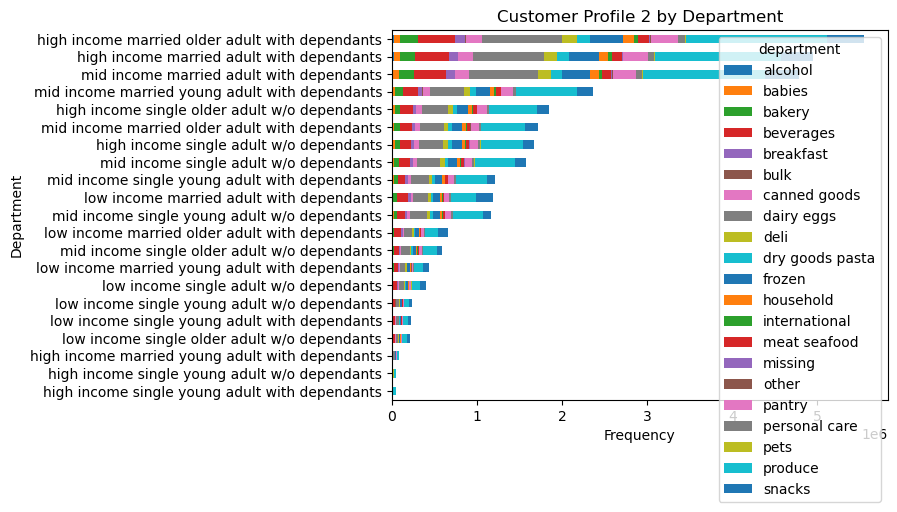

In [76]:
# Group by 'customer profile 2' and 'department'

customers_profile2_department = df_merged.groupby(['profile_2','department']).size().unstack()

# Sort

customers_profile2_department = customers_profile2_department.loc[customers_profile2_department.sum(axis = 1).sort_values(ascending = True).index]

# Create bar chart

customers_profile2_department = customers_profile2_department.plot.barh(stacked = True, title = 'Customer Profile 2 by Department')

# X-Axis Label

plt.xlabel('Frequency')

# Y-Axis Label

plt.ylabel('Department')

In [77]:
# Exporting 'Customer Profile 2' by 'department'

customers_profile2_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customers_profile_2_by_department.png'))